In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the dataset for Kyoto
kyoto = pd.read_csv('data/kyoto.csv')

In [3]:
# Loading the dataset for Liestal
liestal = pd.read_csv('data/liestal.csv')

In [4]:
# Loading the dataset for Washington DC
washingtondc = pd.read_csv('data/washingtondc.csv')

In [5]:
all_places = pd.concat([washingtondc, kyoto, liestal])
all_places.head()

,location,lat,long,alt,year,bloom_date,bloom_doy
0,washingtondc,38.88535,-77.038628,0,1921,1921-03-20,79
1,washingtondc,38.88535,-77.038628,0,1922,1922-04-07,97
2,washingtondc,38.88535,-77.038628,0,1923,1923-04-09,99
3,washingtondc,38.88535,-77.038628,0,1924,1924-04-13,104
4,washingtondc,38.88535,-77.038628,0,1925,1925-03-27,86


In [6]:
all_places.head()

,location,lat,long,alt,year,bloom_date,bloom_doy
0,washingtondc,38.88535,-77.038628,0,1921,1921-03-20,79
1,washingtondc,38.88535,-77.038628,0,1922,1922-04-07,97
2,washingtondc,38.88535,-77.038628,0,1923,1923-04-09,99
3,washingtondc,38.88535,-77.038628,0,1924,1924-04-13,104
4,washingtondc,38.88535,-77.038628,0,1925,1925-03-27,86


In [7]:
X = all_places.drop(['bloom_doy', 'bloom_date', 'year'], axis=1)

In [8]:
Y = all_places['bloom_doy']

In [9]:
from sklearn.preprocessing import PolynomialFeatures

In [10]:
X = pd.get_dummies(X, columns=['location'])
X.head()

,lat,long,alt,location_kyoto,location_liestal,location_washingtondc
0,38.88535,-77.038628,0,0,0,1
1,38.88535,-77.038628,0,0,0,1
2,38.88535,-77.038628,0,0,0,1
3,38.88535,-77.038628,0,0,0,1
4,38.88535,-77.038628,0,0,0,1


In [11]:
X.shape

(1062, 6)

In [12]:
polynomial_features = PolynomialFeatures(degree=2, include_bias=False)

In [13]:
polynomial_features.fit(X)

PolynomialFeatures(include_bias=False)

In [14]:
polynomial_features = polynomial_features.transform(X)

In [15]:
polynomial_features.shape

(1062, 27)

In [16]:
polynomial_features[0]

array([ 3.88853496e+01, -7.70386278e+01,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  1.00000000e+00,  1.51207041e+03, -2.99567397e+03,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  3.88853496e+01,
        5.93495017e+03, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -7.70386278e+01,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  1.00000000e+00])

In [17]:
X.iloc[0]

lat                      38.885350
long                    -77.038628
alt                       0.000000
location_kyoto            0.000000
location_liestal          0.000000
location_washingtondc     1.000000
Name: 0, dtype: float64

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(polynomial_features, Y, test_size=0.3, random_state=101)

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
model = LinearRegression()

In [22]:
model.fit(X_train, y_train)

LinearRegression()

In [23]:
test_predictions = model.predict(X_test)

In [23]:
# model.coef_

In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [26]:
MAE = mean_absolute_error(y_test, test_predictions)

In [27]:
MAE

5.561113985354623

In [28]:
MSE = mean_squared_error(y_test, test_predictions)

In [29]:
MSE

50.463112512539176

In [30]:
RMSE = np.sqrt(MSE)

In [31]:
RMSE

7.103739333093464

In [32]:
MAE

5.561113985354623

In [33]:
RMSE

7.103739333093464

In [34]:
train_rmse_errors = []
test_rmse_errors = []

for i in range(1, 10):
    poly_converter = PolynomialFeatures(degree=i, include_bias=False)
    poly_features = poly_converter.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(poly_features, Y, test_size=0.3, random_state=101)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    train_predict = model.predict(X_train)
    test_predict = model.predict(X_test)
    
    train_rmse = np.sqrt(mean_squared_error(y_train, train_predict))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predict))
    
    train_rmse_errors.append(train_rmse)
    test_rmse_errors.append(test_rmse)

In [35]:
train_rmse_errors

[7.288541381434072,
 7.288669800489242,
 7.288643129461159,
 7.2885440145459715,
 7.2885577993077755,
 7.339633333490266,
 7.28858364682581,
 7.288627907855935,
 7.288549151547274]

In [36]:
test_rmse_errors

[7.100217898034065,
 7.103739333093464,
 7.103149876698765,
 7.099608595806375,
 7.100903068228951,
 7.11349493678591,
 7.098988847334849,
 7.098809852598264,
 7.098940951736488]

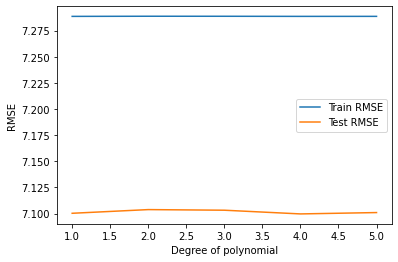

In [37]:
plt.plot(range(1, 6), train_rmse_errors[0: 5], label='Train RMSE')
plt.plot(range(1, 6), test_rmse_errors[0: 5], label='Test RMSE')
plt.xlabel('Degree of polynomial')
plt.ylabel('RMSE')
plt.legend()

In [38]:
all_places.iloc[-1]

location         liestal
lat              47.4814
long            7.730519
alt                  350
year                2021
bloom_date    2021-03-28
bloom_doy             87
Name: 127, dtype: object

In [39]:
X.iloc[0]

lat                      38.885350
long                    -77.038628
alt                       0.000000
location_kyoto            0.000000
location_liestal          0.000000
location_washingtondc     1.000000
Name: 0, dtype: float64

In [41]:
test_predictions = [round(pred) for pred in test_predictions]

In [44]:
avg_no_of_days = round(np.mean(test_predictions))

In [45]:
avg_no_of_days

103

In [46]:
print('The earliest predicted blossom date: ', min(test_predictions))

The earliest predicted blossom date:  95


In [47]:
print('The latest predicted blossom date: ', max(test_predictions))

The latest predicted blossom date:  104
